# Feed Forward Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy

In [2]:
# Preprocessing Parameters
TRAIN_DIR = "../data/train/"
VALIDATION_SPLIT = 0.2
IMAGE_SIZE = (128, 128)
SEED = 1

# Training Parameters
NUM_CLASSES = 42
EPOCH = 30
BATCH_SIZE = 64
OPTIMIZER = "adam"
LOSS_FN = "categorical_crossentropy"
METRICS = ["accuracy"]

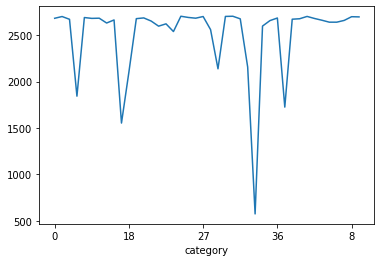

In [10]:
filepath_df = pd.read_csv("../data/train.csv")
filepath_df["category"] = filepath_df["category"].astype(str)
filepath_df["filepath"] = filepath_df["category"].apply(lambda x: "{0:0>2}".format(x))
filepath_df["filepath"] = filepath_df["filepath"] + "/" + filepath_df["filename"]
filepath_df.head()
display(filepath_df.groupby("category").count()["filename"].plot())

In [11]:
train_df, validation_df = train_test_split(
    filepath_df,
    test_size = VALIDATION_SPLIT,
    random_state = SEED,
    shuffle = True
)

,filename,category,filepath
98160,119ea2816ebd2c34d56d24acd3cee4ba.jpg,14,14/119ea2816ebd2c34d56d24acd3cee4ba.jpg
95451,60e1af62fb03a7ddb5b826b5a25d5933.jpg,13,13/60e1af62fb03a7ddb5b826b5a25d5933.jpg
6792,836fd14b6cb0cc8f0a23cb731edd196a.jpg,32,32/836fd14b6cb0cc8f0a23cb731edd196a.jpg
84977,082ca9c67c2a0fb4866ddf66df98782e.jpg,23,23/082ca9c67c2a0fb4866ddf66df98782e.jpg
105282,d30e1453981548d33c364ff44388ce54.jpg,25,25/d30e1453981548d33c364ff44388ce54.jpg


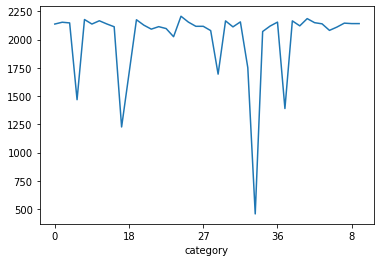

In [12]:
# Train Dataframe Categorical Distribution
display(train_df.head())
display(train_df.groupby("category").count()["filename"].plot())

,filename,category,filepath
10798,79b16738399ef93aed3bdbf2d54c2b57.jpg,34,34/79b16738399ef93aed3bdbf2d54c2b57.jpg
65807,3664584a47f32d7e50e3448fadf8b696.jpg,30,30/3664584a47f32d7e50e3448fadf8b696.jpg
54082,fd181228860463ad0c1fe7dbf60074f4.jpg,0,00/fd181228860463ad0c1fe7dbf60074f4.jpg
62349,7ea04bc090511686aabb8382ab0150c9.jpg,31,31/7ea04bc090511686aabb8382ab0150c9.jpg
85591,a978972adcb87c1563a81f2467170d63.jpg,23,23/a978972adcb87c1563a81f2467170d63.jpg


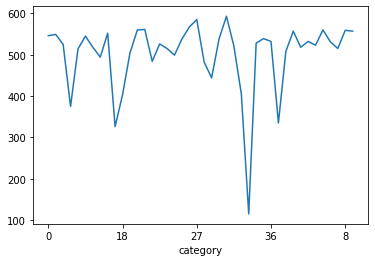

In [13]:
# Validation Dataframe Categorical Distribution
display(validation_df.head())
display(validation_df.groupby("category").count()["filename"].plot())

## Preprocessing - Grayscale + Augment

Augmentation:
- 45 deg rotation rage
- random horizontal and vertical flip
- 40% zoom range

In [14]:
# Loading Data
image_generator = ImageDataGenerator(
    rescale = 1/255,
    validation_split = VALIDATION_SPLIT,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.4
)

In [15]:
# Splitting input data into train and validation sets while
# converting images to 1-channel grayscale in real time
train_data_gen = image_generator.flow_from_dataframe(
    train_df,
    color_mode = "grayscale",
    x_col = "filepath",
    y_col = "category",
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    shuffle = True,
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    seed = SEED,
    subset = "training"
)

validation_data_gen = image_generator.flow_from_dataframe(
    validation_df,
    color_mode = "grayscale",
    x_col = "filepath",
    y_col = "category",
    directory = TRAIN_DIR,
    batch_size = BATCH_SIZE,
    target_size = IMAGE_SIZE,
    class_mode = "categorical",
    subset = "validation"
)

KeyboardInterrupt: 

In [ ]:
# Defining Model Architecture
model = Sequential([
    Flatten(input_shape = IMAGE_SIZE),
    Dense(128, activation = "relu"),
    Dense(NUM_CLASSES, activation = "softmax")
])

In [ ]:
model.compile(
    optimizer = OPTIMIZER,
    loss = LOSS_FN,
    metrics = METRICS
)

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = len(train_df) // BATCH_SIZE
    epochs = EPOCHS,
    validation_data = validation_data_gen,
    validation_steps = len(validation_df) // BATCH_SIZE
    # use_multiprocessing = True
)

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["validation_accuracy"]
validation_loss = history.history["validation_loss"]

epochs_range = range(EPOCHS)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()